# 42. K-Nearest Neighbour (Classification) (Practical)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv(r'Data/Social_Network_Ads_2.csv')
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [4]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Step 1: Check how the data is distributed through graph

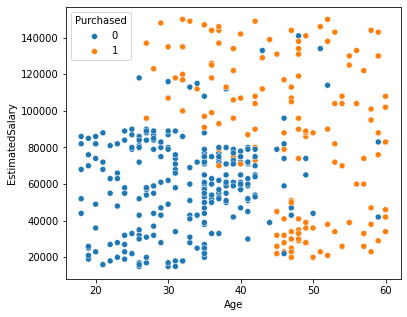

In [7]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="Age", y="EstimatedSalary", data=dataset, hue="Purchased")
plt.show()

### Step 2: Split the data into dependent and independent variables

In [5]:
x = dataset.iloc[:,:-1]
y = dataset['Purchased']

### Step 3: Perform scaling of the data

In [8]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
sc.fit(x)
# after transforming the data through 'sc.transform(x)' convert it to dataframe
x = pd.DataFrame(sc.transform(x), columns=x.columns)
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


### Step 4: Split the data into train and test data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

### Step 5: Build the Model through K-NN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

- We are using 'KNeighborsClassifier' b/c the output in this example is in classification nature (0 and 1)

In [16]:
# default: n_neighbors=5
''' p : int, default=2
    Power parameter for the Minkowski metric. When p = 1, this is
    equivalent to using manhattan_distance (l1), and euclidean_distance
    (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.'''

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

### Step 6: Check the accuracy of built K-NN model

In [17]:
knn.score(x_test, y_test)*100

92.5

**Change the value of neighbor to adjust the accuracy of model**

In [19]:
knn1 = KNeighborsClassifier(n_neighbors=7)
knn1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [20]:
knn1.score(x_test, y_test)*100

93.75

### Step 7: To check whether the built K-NN model is over-fit

In [21]:
knn1.score(x_test, y_test)*100

93.75

In [22]:
knn1.score(x_train, y_train)*100

91.875

**The built KNN Model is not well trained as there is difference b/w training and testing score difference. So keep on changing value of n_neighor to train the model well and to avoid over-fitting**

### Step 8: Apply loop to find the optimum n-neighbor value for avoiding over-fitting

- To find right value of n-neighbor, we will run loop to see at which value there is no major difference b/w training and testing data accuracies.

In [28]:
for i in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train, y_train)
    #print("Testing Data Score:", knn2.score(x_test, y_test)*100, "Training Data Score:", knn2.score(x_train, y_train)*100, "Iteration#: ", i)
    print(i, knn2.score(x_test, y_test)*100, knn2.score(x_train, y_train)*100)

1 86.25 99.6875
2 86.25 91.5625
3 91.25 92.5
4 92.5 91.875
5 92.5 90.9375
6 90.0 90.9375
7 93.75 91.875
8 92.5 90.625
9 93.75 91.25
10 92.5 90.625
11 92.5 90.9375
12 92.5 91.25
13 92.5 91.5625
14 92.5 90.625
15 92.5 90.625
16 92.5 90.0
17 92.5 90.625
18 92.5 90.3125
19 92.5 90.9375
20 93.75 90.0
21 92.5 90.3125
22 93.75 90.0
23 93.75 90.3125
24 93.75 89.375
25 93.75 90.0
26 93.75 89.375
27 92.5 89.375
28 93.75 88.75
29 93.75 88.75


- **Over-fitting:**: When accuracy of traning data set is greater than testing data set
- **Under-fitting:**: When accuracy of traning data set is less than testing data set
- 1 86.25 99.6875 = overfitting
- 2 86.25 91.5625 = overfitting
- 3 91.25 92.5 = almost good model, as no major difference b/w accuracies of training and testing data set
- 4 92.5 91.875 = underfitting
- 5 92.5 90.9375 = underfitting
- **6 90.0 90.9375 = Best fit**

In [32]:
# So will choose 6
knn3 = KNeighborsClassifier(n_neighbors=6)
knn3.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [33]:
knn3.score(x_test, y_test)*100

90.0

In [34]:
knn3.score(x_train, y_train)*100

90.9375

### Step 9: Peform prediction on tunned model i.e., knn3

**It is very important to remember that give scalling data for prediction instead of original data**, as the model is trained on scalling data

In [40]:
# This is original data
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [41]:
# This is scalled data
x.head(3)

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290


In [42]:
# So we will give scalled data as input to the model for prediction
knn3.predict([[-1.781797,-1.490046]])

C:\Users\rashi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

**Accurate Prediction!!!**

In [43]:
dataset.tail(3)

,Age,EstimatedSalary,Purchased
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [44]:
x.tail(3)

,Age,EstimatedSalary
397,1.179110,-1.460681
398,-0.158074,-1.078938
399,1.083596,-0.990844


In [45]:
knn3.predict([[1.083596,-0.990844]])

C:\Users\rashi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

**Accurate Prediction!!!**

### Step 10: Check Decision Boundaries through graph

In [46]:
from mlxtend.plotting import plot_decision_regions

C:\Users\rashi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


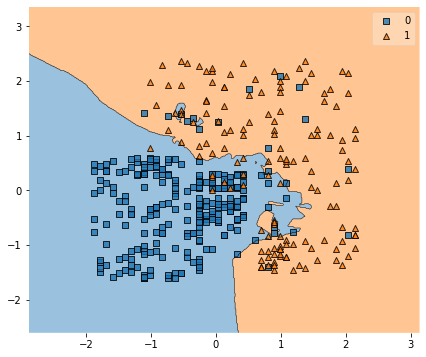

In [48]:
plt.figure(figsize=(7,6))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=knn3)
plt.show()